<a href="https://colab.research.google.com/github/mk7890/Machine-Learning-II/blob/main/ML2_WikipediaTrafficData_prophetModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
# Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the Data

In [ ]:
'''https://www.kaggle.com/competitions/web-traffic-time-series-forecasting/overview'''

df = pd.read_csv('/content/train_1.csv')
df.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [ ]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [ ]:
# Reshape the dataset from wide to long format
df_long = df.melt(id_vars=['Page'], var_name='Date', value_name='Traffic')

In [ ]:
df_long.head()

,Page,Date,Traffic
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN


In [ ]:
# Convert 'Date' to datetime
df_long['Date'] = pd.to_datetime(df_long['Date'])
df_long.head()

,Page,Date,Traffic
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN


In [ ]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79784650 entries, 0 to 79784649
Data columns (total 3 columns):
 #   Column   Dtype         
---  ------   -----         
 0   Page     object        
 1   Date     datetime64[ns]
 2   Traffic  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.8+ GB


In [ ]:
# Handle missing values in the long-format dataset
df_long['Traffic'] = df_long['Traffic'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

In [ ]:
df_long['Page'].nunique()

145063

In [ ]:
df_long['Page'].head(25) # Check the available pages

,Page
0,2NE1_zh.wikipedia.org_all-access_spider
1,2PM_zh.wikipedia.org_all-access_spider
2,3C_zh.wikipedia.org_all-access_spider
3,4minute_zh.wikipedia.org_all-access_spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
5,5566_zh.wikipedia.org_all-access_spider
6,91Days_zh.wikipedia.org_all-access_spider
7,A'N'D_zh.wikipedia.org_all-access_spider
8,AKB48_zh.wikipedia.org_all-access_spider
9,ASCII_zh.wikipedia.org_all-access_spider


In [ ]:
# Filter for the specific page
page_to_forecast = 'BLACK_PINK_zh.wikipedia.org_all-access_spider'  # Replace with your target page
df_page = df_long[df_long['Page'] == page_to_forecast]

In [ ]:
# Check if the dataset is sufficient for modeling
if len(df_page) < 2:
    raise ValueError(f"Not enough data for page {page_to_forecast} after preprocessing.")

In [ ]:
df_page_prophet = df_page.rename(columns={'Date': 'ds', 'Traffic': 'y'}) # Prepare data for Prophet

In [ ]:
model = Prophet() # Initialize the Prophet model
model.fit(df_page_prophet) # fit the Prophet model

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbwc6d14l/8ojrrovc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbwc6d14l/cmtj6bfe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14872', 'data', 'file=/tmp/tmpbwc6d14l/8ojrrovc.json', 'init=/tmp/tmpbwc6d14l/cmtj6bfe.json', 'output', 'file=/tmp/tmpbwc6d14l/prophet_modelcdeeavic/prophet_model-20250114102935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:29:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:29:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a dataframe for future dates
future_dates = model.make_future_dataframe(periods=365)  # Forecast desired days ahead

In [ ]:
# Make predictions
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
910,2017-12-27,217.852483,118.085874,320.098802
911,2017-12-28,206.354169,98.445107,313.196044
912,2017-12-29,205.543279,102.355350,309.492947
913,2017-12-30,208.622027,103.700280,318.526414
914,2017-12-31,202.693025,99.148703,306.681980


## Prediction Trend Plot

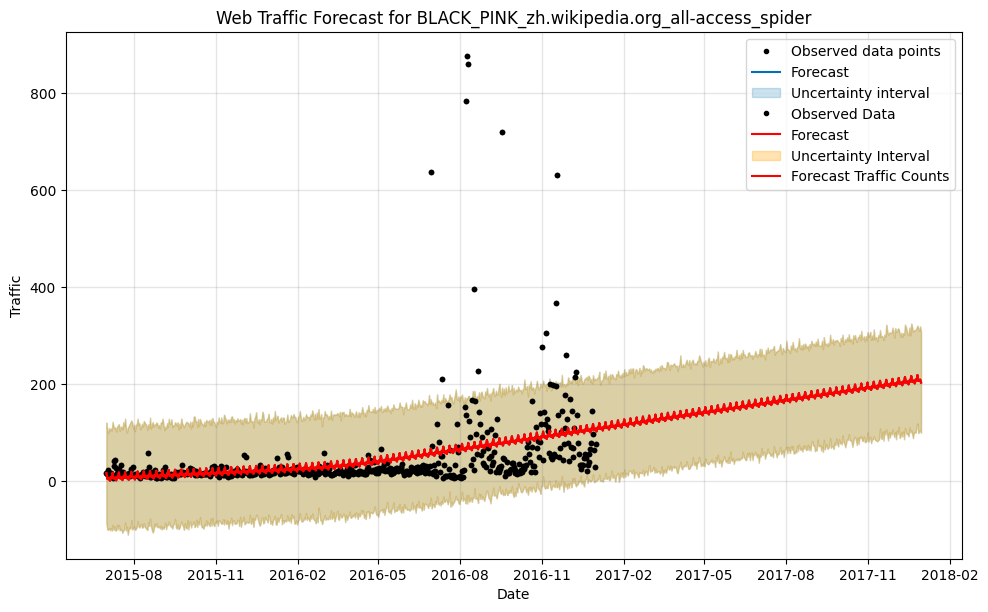

In [ ]:
fig = model.plot(forecast)# Plot the forecast
plt.title(f"Web Traffic Forecast for: {page_to_forecast}") # Add title
plt.xlabel("Date")# Add X labels
plt.ylabel("Traffic")# Add X labels
# Add custom legend
plt.plot(df_page_prophet['ds'], df_page_prophet['y'], 'k.', label='Observed Data')
plt.plot(forecast['ds'], forecast['yhat'], 'r-', label='Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3, label='Uncertainty Interval')
plt.plot(forecast['ds'], forecast['yhat'], 'r-', label='Forecast Traffic Counts')
plt.legend()# Display the legend
plt.show()# Show the plot

# Validation Metrics

In [ ]:
# Evaluate using a validation set
# Define the validation period (e.g., last 30 days of the original data)
validation_start_date = '2016-12-01'  # Adjust based on your dataset
validation_end_date = '2016-12-31'
# Filter actual data for the validation period
df_actual = df_page_prophet[df_page_prophet['ds'].between(validation_start_date, validation_end_date)]
# Filter forecasted data for the same validation period
forecast_validation = forecast[forecast['ds'].between(validation_start_date, validation_end_date)]
# Ensure the dataframes align on the same dates
evaluation_df = df_actual.merge(forecast_validation[['ds', 'yhat']], on='ds', how='inner')
# Check for empty dataframe
if evaluation_df.empty:
    print(f"No data available for the selected validation period ({validation_start_date} to {validation_end_date}).")
else:
    # Calculate evaluation metrics
    mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
    mse = mean_squared_error(evaluation_df['y'], evaluation_df['yhat'])
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((evaluation_df['y'] - evaluation_df['yhat']) / evaluation_df['y'])) * 100
    r2 = r2_score(evaluation_df['y'], evaluation_df['yhat'])

    # Print metrics
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}%")
    print(f"R-squared: {r2}")

MAE: 55.4289260923705
MSE: 3786.6219043112214
RMSE: 61.535533672108684
MAPE: 119.23361550915533%
R-squared: -0.33114909687618965


## Using Plotly for Interactive Visualizations

In [ ]:
fig = go.Figure() # Create figure
# Add observed data points (actual traffic)
fig.add_trace(go.Scatter(x=df_page_prophet['ds'], y=df_page_prophet['y'], mode='markers', name='Observed Data', marker=dict(color='black')))
# Add forecasted traffic (yhat)
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='red')))
# Add uncertainty interval (yhat_lower to yhat_upper)
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', name='Lower Bound', line=dict(color='orange', width=0), showlegend=False))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', name='Upper Bound', line=dict(color='orange', width=0), fill='tonexty', fillcolor='rgba(255, 165, 0, 0.3)', showlegend=False))
# Add title and axis labels
fig.update_layout(
    title=f"Web Traffic Forecast for {page_to_forecast}",
    xaxis_title="Date",
    yaxis_title="Traffic",
    legend_title="Legend",
)
fig.show()# Show the plot


In [ ]:
# Save the forecast
forecast.to_csv('web_traffic_forecast.csv', index=False)